### Ordinary Differential Equations: Boundary Value Problems

In [6]:
import sys

sys.path.append('..')

### Example #1

$y'' = 1, y(0) = 0, y(1) = 0$

$y''_i = \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} + O(h^2)$

$\frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} = 1$

$y_{i+1} - 2y_i + y_{i-1} = h^2$

$y_0 = 0, y_{n-1} = 0$

In [7]:
import numpy as np
from math import pi
from modules.slae.solver.direct.lu_decomposition import lu_3_diag_decomposition, lu_3_diag_solve

a = 0
b = 1.
N = [5, 25, 125]

x = [np.linspace(a, b, n) for n in N]
y = []

for i in range(len(N)):
    n = N[i]
    h = x[i][1] - x[i][0]

    d = -2*np.ones(n)
    c = np.ones(n - 1)
    e = np.ones(n - 1)

    d[0] = 1.
    d[n-1] = 1.

    e[0] = 0.
    c[n-2] = 0.

    b = h*h*np.ones(n)

    b[0] = 0.
    b[n-1] = 0.

    ct, dt, et = lu_3_diag_decomposition(c, d, e)     

    y.append(lu_3_diag_solve(ct, dt, et, b))

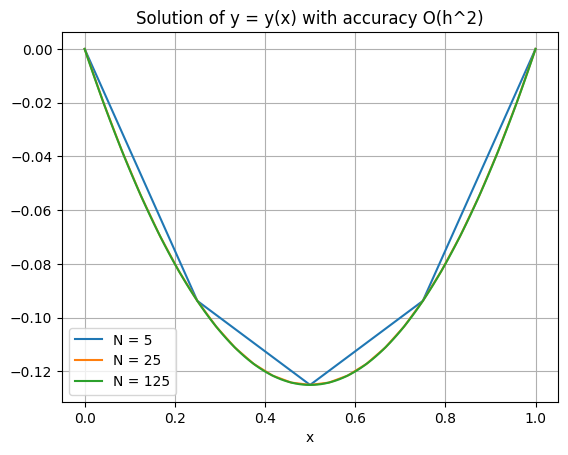

In [8]:
import matplotlib.pyplot as plt

for i in range(len(N)):
    plt.plot(x[i], y[i], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) with accuracy O(h^2)")
plt.xlabel('x')
plt.grid()
plt.legend()

### Example #2

$y'' = -4y + 4x, y(0) = 0, y'(\pi/2) = 0$

$y_{i+1} + (4h^2 - 2)y_i + y_{i-1} = 4h^2x_i$

$y_0 = 0$

$y'_i = \frac{y_{i+1} - y_{i-1}}{2h} + O(h^2)$

$y'_{n-1} = \frac{y_{n} - y_{n-2}}{2h} = 0 \Rightarrow y_{n} = y_{n-2}$  

$y_n + (4h^2 - 2)y_{n-1} + y_{n-2} = 4h^2x_{n-1} \Rightarrow (4h^2 - 2)y_{n-1} + 2y_{n-2} = 4h^2x_{n-1}$

In [9]:
a = 0
b = pi/2

x = [np.linspace(a, b, n) for n in N]
y = []

for i in range(len(N)):
    n = N[i]
    h = x[i][1] - x[i][0]

    d = np.ones(n)*(4*h*h - 2.)
    c = np.ones(n - 1)
    e = np.ones(n - 1)

    d[0] = 1.
    
    e[0] = 0.
    c[n-2] = 2.

    b = 4*h*h*x[i]

    b[0] = 0.

    ct, dt, et = lu_3_diag_decomposition(c, d, e)     

    y.append(lu_3_diag_solve(ct, dt, et, b))

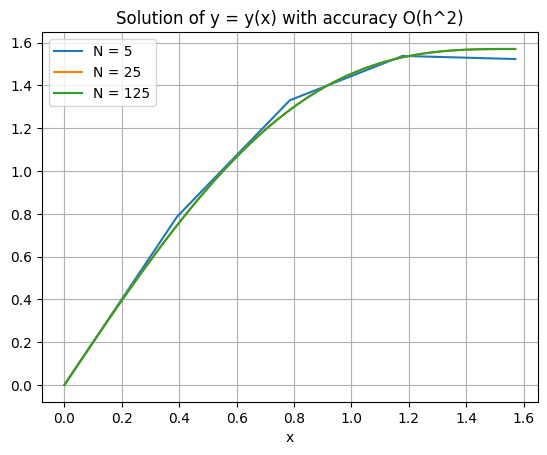

In [10]:
for i in range(len(N)):
    plt.plot(x[i], y[i], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) with accuracy O(h^2)")
plt.xlabel('x')
plt.grid()
plt.legend()